# Giải thích chi tiết cho nhiệm vụ Titanic

Hello mọi người! Hôm nay mình sẽ chia sẻ kinh ngiệm về nhiệm vụ Dự đoán người sống sôt sau vụ đắm tàu Titanic năm 1912 trên Kaggle: Titanic - Machine Learning from Disaster https://www.kaggle.com/competitions/titanic
Đây là một nhiệm vụ cơ bản về Machine Learning với số liệu rõ ràng, trực quan giúp bạn bước đầu tiến vào con đường chạm tới ước mơ ^^ . Hãy cùng mình ngiên cứu nhiệm vụ nào:

![Titanic Movie](titanic.jpg)

## 0.Introduction

Bộ dữ liệu của cuộc thi này gồm 2 tệp: train.csv và test.csv. Bộ train_data chứa thông tin về 891 hành khách trên chuyến tàu định mệnh đó, và bộ test gồm 418 hành khách.

Thông tin về mỗi hành khách bao gồm:
* PassengerId : Id của hành khách
* Survival: 1 - sống, 0 - chết (không có trong test_data - dữ liệu cần dự đoán)
* Pclass : Loại vé tàu (1 - Hạng thương gia, 2 - Hạng trung bình, 3 - Hạng phổ thông)
* Sex : Giới tính (Male/Female)
* Age
* Sibsp : số lượng anh chị em hoặc vợ chồng đi cùng (number of siblings/spouses abroard the Titanic
* Parch : số lượng bố mẹ hoặc con cái đi cùng (number òf parents/children abroard the Titanic
* Ticket: Số vé
* Fare : Giá vé
* Cabin : Số cabin (vị trí)
* Embarked : Cảng xuất phát (C - Cherbourq, Q - Queenstown, S - Southampton)

**Yêu cầu**: Dự đoán Survival cho tệp test.csv và tạo thành file gồm 2 cột PassengerId, Survived

## 1.Load data

Import các thư viện cơ bản cần thiết: numpy, pandas, seaborn

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Load data:

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Khi load data bằng cách này thì pd sẽ sinh ra thêm 1 cột id từ 0. Trong nhiệm vụ của chúng ta thì cột này bị thừa do đã có cột PasengerId nên cần xóa cột Id đi:

In [3]:
train_data.set_index(train_data.PassengerId, inplace = True)   #set lại cột id = PassengerId
train_data.drop('PassengerId', axis = 1, inplace = True)       # xóa cột PassengerId
train_data.info()      #thông tin về train_data

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Đọc dữ liệu test data và đặt id là cột PassengerId luôn

In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv", index_col = "PassengerId")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


 Gộp dữ liệu tập train_data và test_data lại cho đỡ phải làm 2 lần

In [5]:
test_data.insert(0, 'Survived', np.nan)   #Tạo cột Survived toàn giá trị NaN vào vị trí 0 trong bảng test_data
test_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data = np.concatenate([train_data, test_data], axis = 0)          #Nối train và test_data
data_df = pd.DataFrame(data, columns = train_data.columns, index = range(1,len(data)+1))     #chuyển data từ dạng numpy thành DataFrame
data_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


## 2. Exploratory Data Analysis (EDA)

### 2.1. Feature Classification: Categorical và Numerical

* Categorical: Pclass, Sex, SibSp, Parch, Embarked, Survived
* Numerical : Age, Fare

In [7]:
train_data.Survived = train_data.Survived.astype("category")      #chuyển Survived thành loại Categorical
converted_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

def convert_cat(df, features):         #hàm chuyển features thành loại Categorical
    for feature in features:
        df[feature] = df[feature].astype('category')

convert_cat(train_data, converted_features)
convert_cat(test_data, converted_features)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


Phân bố của các kiểu dữ liệu:
* Numerical
* Categorical

In [8]:
train_data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
train_data.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### 2.2. Phân tích dữ liệu cho biến phân loại (EDA for categorical)
 Survived, Pclass, Sex, SibSp, Parch, Embarked
* Survived 


In [10]:
train_data['Survived'].value_counts(normalize=True).to_frame()     #Tính phần trăm ng sống sót

,proportion
Survived,
0,0.616162
1,0.383838


* Sex

In [11]:
train_data['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Sex', ylabel='count'>

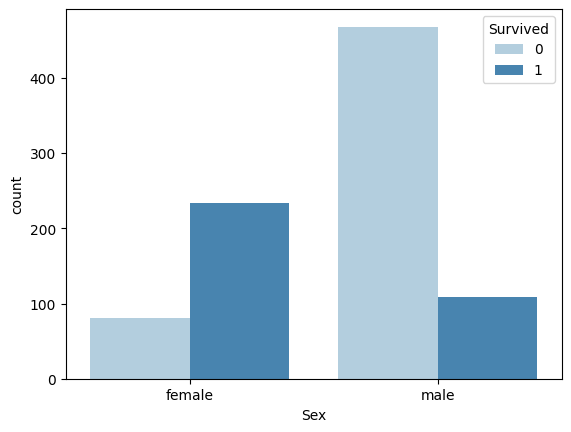

In [12]:
sns.countplot(data = train_data, x = 'Sex', hue = 'Survived', palette = 'Blues')    #Biểu diễn phần trăm sống sôt theo giới tính

* Biểu diễn tất cả các thuộc tính: Sex, Embarked, Pclass, SibSp, Parch

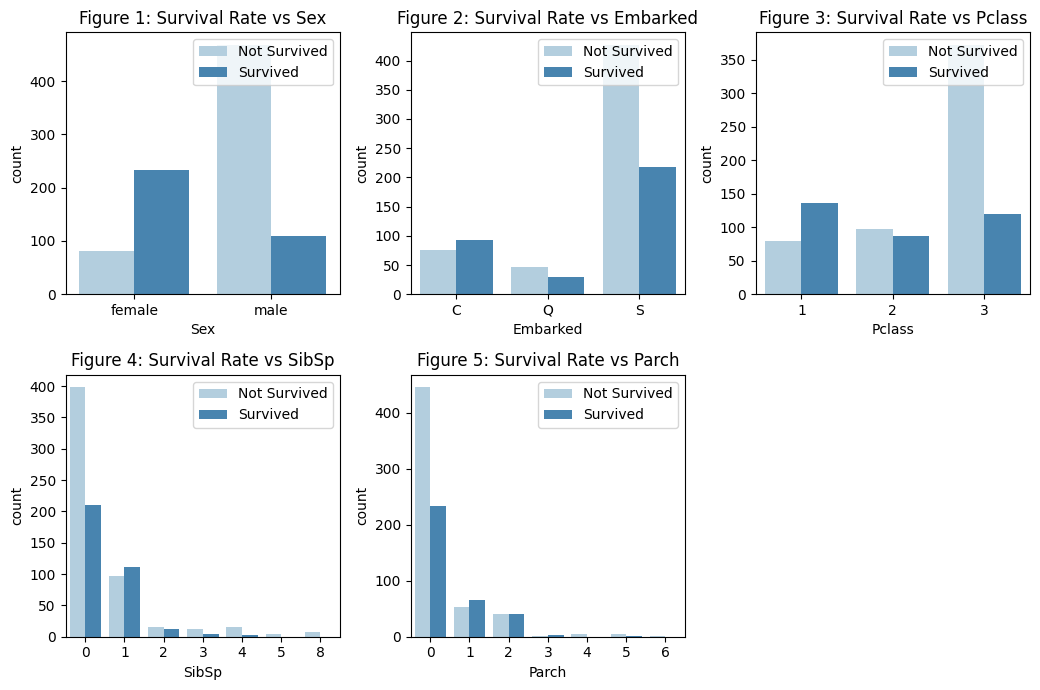

In [13]:
cols = ['Sex', 'Embarked','Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3
fig, ax =plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))   #tạo khung để vẽ các đồ thị

for r in range(n_rows):
    for c in range(n_cols):
        i = r*n_cols + c           #đồ thị thuộc khung thứ i
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_data, x = cols[i], hue = 'Survived', palette = 'Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc = 'upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)       #không hiển thị khung cuối cùng(thừa)
plt.tight_layout()
plt.show()

**Comment** : Tỉ lệ sống sót cao hơn ở:
Sex - phụ nữ, Embarked - xuất phát từ cảng C, Pclass - 1 hạng thương gia, có 1 ng thân đi cùng  

### 2.3.Phân tích dữ liệu cho biến số (EDA for numerical)
* Age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

<Axes: xlabel='Age', ylabel='Count'>

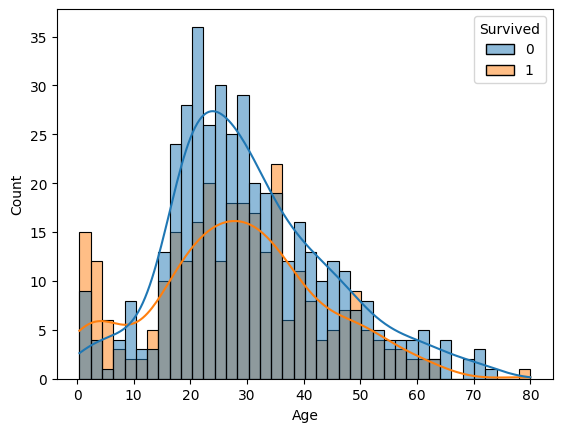

In [14]:
sns.histplot(data = train_data, x = 'Age', hue = 'Survived', bins = 40, kde = True)
#vẽ đồ thị của biến Age chia thành 40 bins, biểu diễn tỉ lệ sống sót

**Comment**: Tỉ lệ sống sót cao hơn ở trẻ em

* Fare

In [15]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

<Axes: xlabel='Fare', ylabel='Count'>

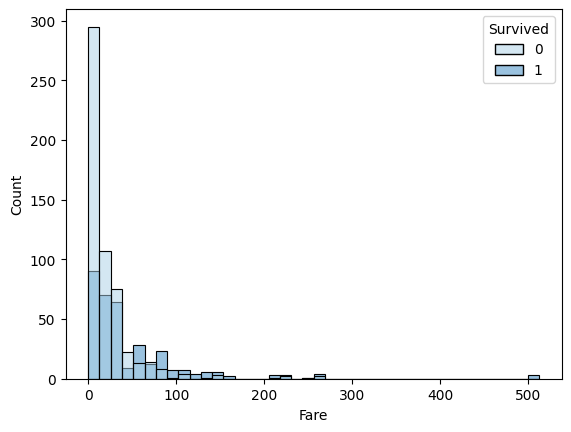

In [16]:
sns.histplot(data = train_data, x = 'Fare', hue = 'Survived', bins = 40, palette = 'Blues')

**Comment**: Đồ thị trên khá lộn xộn, không rõ ràng đặc điểm của giá vé. Vì vây, chúng ta nên chia thành từng khoảng để nghiên cứu rõ hơn

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Fare', ylabel='count'>

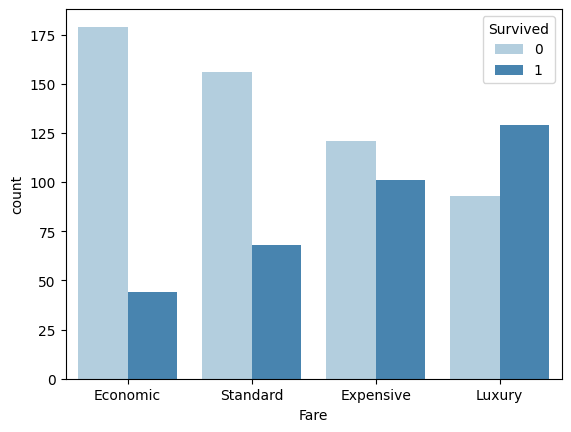

In [17]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']        #Chia thành 4 khoảng giá trị có tên fare_categories
quartitle_data = pd.qcut(train_data['Fare'], 4, labels = fare_categories)    #Sử dụng pd.cut để chia

sns.countplot(x = quartitle_data, hue = train_data['Survived'], palette = 'Blues')    

**Comment**: Đây là 1 cách hay để chuyển Fare từ dạng số sang dạng category (4 loại)

## 3.Feature Engineering vs Data Wrangling
### 3.1 Feature Engineering
Từ các đặc trưng có sẵn biến đổi thành các tính năng mới giúp mô hình dự đoán tốt hơn
* **Name**

In [18]:
train_data['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

**Comment**: Nhận thấy Name có dạng Last_name + danh hiệu(Title) + Name (Nếu là phụ nữ đã có chồng thì còn có (Tên thời con gái))
Tạo đặc tính mới **Title**

In [19]:
import re
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")        #Biểu thức để tìm Title
    return p.search(name).groups(1)[0].strip()

train_data['Title'] = train_data['Name'].apply(lambda name: extract_title(name))      #áp dụng extract_title vào cột Name để tạo cột Title
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

**Comment**: Nhận thấy title chủ yếu là Mr, Miss, Mrs, Master nên ta sẽ chuyển các title khác thành loại Others

Có thể trích xuất tên bằng code: train_data[train_data['Name'].str.contains('Mrs. Martin')]['Name']

In [20]:
test_data['Title'] = test_data['Name'].apply(lambda name: extract_title(name))
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [21]:
def group_title(title):        #Hàm nhóm title
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'

train_data['Title'] = train_data['Title'].apply(lambda title: group_title(title))
test_data['Title'] = test_data['Title'].apply(lambda title: group_title(title))

Vẽ đồ thị để quan sát rõ hơn

<Axes: xlabel='Title', ylabel='count'>

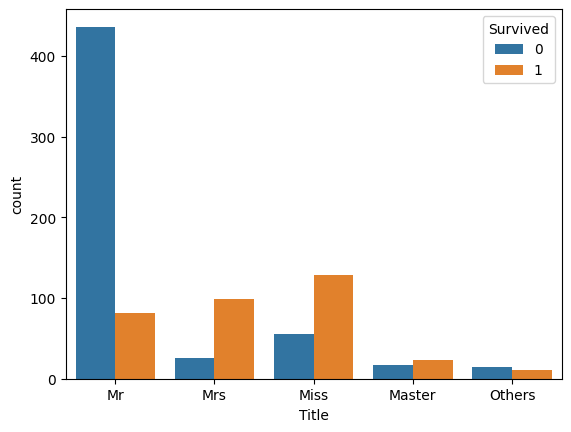

In [22]:
sns.countplot(data = train_data, x ='Title', hue = 'Survived')

**Comment**: Như nhận xét ở phần trước, tỉ lệ nữ sống sót cao hơn

Nghiên cứu Last_Name: những người trong gia đình với nhau thường cùng sống hoặc cùng chết 
**Family_Survival**

In [23]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ',')[0])   #trích xuất Last_Name
DEFAULT_SURVIVAL_VALUE = 0.5
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE    #khởi tạo giá trị trung gian cho mọi hành khách

for grp, grp_df in data_df.groupby(['Last_Name', 'Fare']):       # Nhóm theo Last_Name và Fare: vì gia đình thường có họ giống nhau và giá vé giống
    if len(grp_df) != 1:                                     #len =1 - đi một mình (bỏ qua)
        for ind, row in grp_df.iterrows():                    #Duyệt qua từng hàng trong gia đình
            smax = grp_df.drop(ind)['Survived'].max()         # Tìm xem có ai trong gia đình sống sót không(trừ bản thân)
            smin = grp_df.drop(ind)['Survived'].min()         #Tìm xem có ai die không
            index = ind
            if (smax == 1.0):
                data_df.loc[data_df.index == index, 'Family_Survival'] = 1        #Nếu có người sống sót thì khả năng cao gia đình sống sót
            elif (smin == 0.0):
                data_df.loc[data_df.index == index, 'Family_Survival'] = 0        #Nếu không có ai sống sót thì khả năng cao mình die
                
print('Number of passengers with family survival information:', data_df.loc[data_df['Family_Survival']!= 0.5].shape[0])

Number of passengers with family survival information: 420


In [24]:
for _, grp_df in data_df.groupby('Ticket'):        #Nhóm theo số vé(đi cùng hay mua cùng vé)
    if len(grp_df) != 1:
        for ind, row in grp_df.iterrows():
            if(row['Family_Survival'] == 0)| (row['Family_Survival'] == 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                index = ind
                if smax == 1.0:
                    data_df.loc[data_df.index == index, 'Family_Survival'] = 1
                elif smin == 0.0:
                    data_df.loc[data_df.index == index, 'Family_Survival'] = 0
                    
print('Number of passengers with family or group survival information:', data_df.loc[data_df['Family_Survival']!= 0.5].shape[0])

train_data['Family_Survival'] = data_df['Family_Survival'][:891]       #Gán cột Family_Survival cho train_data
test_data['Family_Survival'] = data_df['Family_Survival'][891:]
train_data.head()

Number of passengers with family or group survival information: 546


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Survival
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.5
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0.5
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.5
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.5


* Đặc tính **Family_Size** = SibSp + Parch + 1 
Biểu diễn số người trong gia đình

In [25]:
train_data['Family_Size'] = train_data['SibSp'].astype(int) + train_data['Parch'].astype(int) +1
test_data['Family_Size'] = test_data['SibSp'].astype(int) + test_data['Parch'].astype(int) + 1

<Axes: xlabel='Family_Size', ylabel='count'>

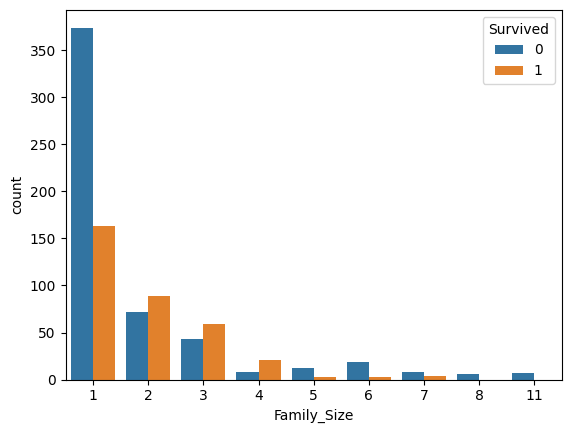

In [26]:
sns.countplot(data = train_data, x = 'Family_Size', hue = 'Survived')

**Comment**: Có ít nhóm gia đình từ 4 người trở lên nên ta có thể nhóm như Fare

In [27]:
train_data['Family_Size'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family_Size, dtype: float64

In [28]:
train_data['Family_Cat'] = pd.cut(train_data['Family_Size'], bins = [0,1,4,6,20])
test_data['Family_Cat'] = pd.cut(test_data['Family_Size'], bins = [0,1,4,6,20])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Family_Cat', ylabel='count'>

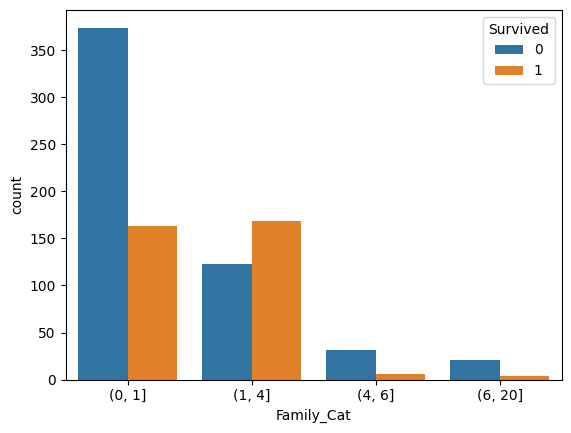

In [29]:
sns.countplot(data= train_data, x = 'Family_Cat', hue = 'Survived')

**Comment**: Đi với nhóm hoặc gia đình nhỏ thì khả năng sống sót cao hơn

* **Cabin** 

Những người thuộc cùng khoang có điều kiện thoát thân như nhau, nên ta nghĩ đến tạo đẵc trưng **Deck**

In [30]:
train_data['Cabin'].isnull().sum()   #kiểm tra xem có bao nhiêu giá trị bị thiếu NaN trong cabin

687

**Comment**: Có khá nhiều giá trị bị thiếu

Câu hỏi đặt ra là có nên tạo ra đặc tính Deck không? Theo như mô hình mình thực nghiệm thì đặc trưng Dẹck không có tác dụng lắm( thậm chí làm giảm score), nhưng đấy là một ý tướng khá hay, có thể không hiệu quả trong nhiệm vụ này nhưng có thể hiệu quả trong nhiệm vụ khác. Việc của chúng ta chính là phân tích và thử nghiệm thật nhiều để tìm ra mô hình tối ưu nhất. Đặc biệt với biến Cabin có dạng cả chữ lẫn số, chẳng hạn C85

In [31]:
def convert_cabin(df):      #hàm trích xuất thông tin boong tàu
    df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')   #chữ cái đầu tiên của Cabin
    
    df['Deck'] = df['Deck'].replace(['A','B','C','T'],'ABC')        #Sau khi biểu diễn đồ thị thì thấy nên nhóm như này
    df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
    df['Deck'] = df['Deck'].replace(['F','G'], 'FG')
    
convert_cabin(train_data)
convert_cabin(test_data)
train_data['Deck']

PassengerId
1        M
2      ABC
3        M
4      ABC
5        M
      ... 
887      M
888    ABC
889      M
890    ABC
891      M
Name: Deck, Length: 891, dtype: object

**Comment**: Ngoài ra, có thể thêm các đặc trưng **Is_Married**, **Ticket_Frequency**

train_data['Is_Married'] = 0
train_data['Is_Married'].loc[train_data['Title'] == 'Mrs'] = 1

train_data['Ticket_Frequency'] = train_data.groupby('Ticket')['Ticket'].transform('count')

Vậy tại sao lại không thêm các đặc trưng này? Càng nhiều thông tin càng dự đoán tốt hơn mà?

Lúc đầu, mình cững nghĩ vậy nhưng hóa ra không phải, quá nhiều thông tin khiến mô hình sẽ bị "loạn" và thừa vì nhiều thông tin không độc lập với nhau, chúng liên quan khiến mô hình ko học thêm được gì mà cứ cố khớp với thông tin đó (Vẽ hình trong không gian 10 chiều khó hơn 2 chiều:(( ) 

Vì vậy hãy nghiên cứu và taọ ra các thông tin độc lập với nhau,dùng PCA cũng là 1 cách hay

### 3.2. Data Wrangling

Xử lý số liệu: Điền các giá trị bị thiếu(như ở trên đã chuyển giá trị Cabin thiếu thành Deck M), mã hoá one hot,...

In [32]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title','Family_Cat', 'Family_Survival', 'Deck']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat', 'Family_Survival', 'Deck']


**Comment**: Có thể chuyển các đặc trưng numerical thành catergical bằng pd.qcut như lúc khảo sát

In [33]:
convert_cat(train_data, cat_features)    #Chuyển cho đúng kiểu của category
convert_cat(test_data, cat_features)

In [34]:
def display_missing(df, feature_cols):      #Hàm in ra phần trăm giá trị bị thiếu trong dữ liệu
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()       #tổng các giá trị bằng NaN
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(train_data, feature_cols)
display_missing(test_data, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


**Comment**: chỉ có 2 giá trị Embarked bị thiếu, nếu bạn tìm kiếm thông tin trên mạng sẽ thấy hai người đó là cô chủ và người hầu từ bến S

* **Điền giá trị thiếu của Age**

Chúng ta có thể điền theo cách đơn giản là điền giá trị trung bình, 0, frequent... với Embarked, Fare nhưng giá trị Age bị thiếu khá nhiều và làm vậy sẽ mất đi tính đúng đắn của biến Age khá nhiều.

Vì vậy hãy khảo sát giá trị tương quan giữa biến **Age** và các giá trị khác

In [35]:
features = ['Pclass', 'Fare','Age', 'SibSp', 'Parch', 'Survived']
data1 = train_data[features]  

correlation_matrix = data1.corr()      #tạo ma trận tương quan
data1_corr = data1.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()     #sắp xếp các giá trự từ cao xuống thấp
data1_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)  # đổi tên cột
data1_corr[data1_corr['Feature 1'] == 'Age']      #chỉ biểu diễn với cột đầu là Age

,Feature 1,Feature 2,Correlation Coefficient
4,Age,Age,1.000000
11,Age,Pclass,0.369226
14,Age,SibSp,0.308247
21,Age,Parch,0.189119
24,Age,Fare,0.096067
30,Age,Survived,0.077221


**Comment**: Độ tương quan giữa Age và Pclass là lớn nhất. Vì vậy, ta sẽ điền giá trị thiếu bằng trung vị theo giới tính **Sex** (nữ thường trẻ hơn nam) và loại vé **PClass** (người trung niên thường giàu hơn)

In [36]:
age_by_sex_pclass = train_data.groupby(['Sex','Pclass'])['Age'].median()
age_by_sex_pclass

/tmp/ipykernel_329/774294934.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_data.groupby(['Sex','Pclass'])['Age'].median()


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [37]:
train_data['Age'] = train_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x : x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x : x.fillna(x.median()))

/tmp/ipykernel_329/3093257334.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data['Age'] = train_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x : x.fillna(x.median()))
/tmp/ipykernel_329/3093257334.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_data['Age'] = test_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x : x.fillna(x.median()))


In [38]:
train_data['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    21.5
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

## 4.Model
### 4.1.Preprocessing

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [40]:
X = train_data[feature_cols]
y = train_data['Survived']
X_test = test_data[feature_cols]

Tạo Pipeline cho từng kiểu dữ liệu khiến cho mô hình rõ ràng hơn

In [41]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),     #điền các giá trị thiếu bằng giá trị trung bình
    ('scaler', StandardScaler()),                        #chuẩn hóa dữ liệu mean,std
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),   #chọn giá trị phổ biến nhất để điền vào giá trị bị thiếu
    ('encoder', OneHotEncoder(handle_unknown = 'ignore')),    #Dùng phương pháp One hot để biến đổi đặc tính kiểu Category
])

In [42]:
preprocessor = ColumnTransformer(transformers=[        #Áp các biến đổi ở trên cho từng cột
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat', 'Family_Survival', 'Deck'])])

In [43]:
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

**Comment**: Trong việc xây dựng model, thường chia dữ liệu thành tập train-val-test (7-2-1/8-1-1)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

In [45]:
X_train.shape, X_val.shape

((712, 26), (179, 26))

### 4.2. Training

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

* Mô hình LogisticRegression

In [47]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8727272727272727, 0.676056338028169)

In [48]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       108
           1       0.87      0.68      0.76        71

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



**Comment**: Chúng ta có thể tạo biến bậc cao cho mô hình Regression

* Mô hình LogisticRegression với đặc tính bậc 2

In [49]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)
poly_log_reg.score(poly_features_X_val, y_val)

0.8212290502793296

* Hãy thử với mô hình DecisionTreeClassifier nhé

In [50]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2022)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_val, y_val)

0.770949720670391

### Cross_validation

Khi ta chia tập dữ liệu ra train và val thì với dữ liệu nhỏ đôi khi sẽ xảy ra hiện tượng quá khớp overfiting trên tập train được chia. Để khắc phục điều này ta sẽ chia dữ liệu thành nhiều folk và tính giá trị đánh giá mô hình trung bình (Mỗi lần chạy mỗi folk được coi như 1 tập val)

In [51]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2024)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring = 'accuracy', cv=5)
dt_scores = cross_val_score(dt_cv, X, y, scoring = 'accuracy', cv=5)
lr_scores.mean(), dt_scores.mean()

(0.8518423200050217, 0.8081350825434687)

### Baseline


Chúng ta cần khảo sát mô hình nào sẽ hiệu quả với dữ liệu này

In [52]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

Tạo ra danh sách các mô hình mà bạn muốn khảo sát:

**Comment**: Có thể tham khảo https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [53]:
seed = 2024
models = [
    LinearSVC(random_state=seed),
    SVC(C = 100, gamma = 0.0001, random_state = seed),
    KNeighborsClassifier(leaf_size=26, metric='minkowski',n_jobs=1, n_neighbors=6, p=2),
    LogisticRegression(solver = 'liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state=seed),
    ExtraTreesClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 100),
    AdaBoostClassifier(learning_rate = 0.01, n_estimators = 300),
    XGBClassifier(learning_rate = 0.01, max_depth = 4, n_estimators = 300),
    GradientBoostingClassifier(learning_rate = 0.05, max_depth=2, n_estimators = 300),
]

Tính score cho mỗi model để đánh giá và chọn ra mô hình phù hợp nhất

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


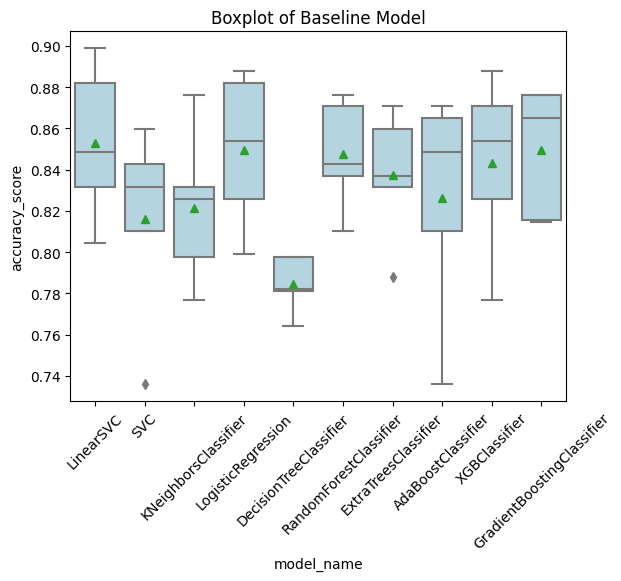

,Mean,Standard Devidation
model_name,,
LinearSVC,0.853029,0.038040
LogisticRegression,0.849664,0.037596
GradientBoostingClassifier,0.849645,0.031847
RandomForestClassifier,0.847404,0.026979
XGBClassifier,0.842948,0.043578
ExtraTreesClassifier,0.837317,0.032054
AdaBoostClassifier,0.826056,0.055678
KNeighborsClassifier,0.821599,0.037809
SVC,0.815944,0.048195


In [54]:
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results = False):        #hàm đánh giá kết quả
    kfold = StratifiedKFold(cv, shuffle = True, random_state = seed)                #chia dữ liệu thành các fold
    entries = []
    for model in models:
        model_name = model.__class__.__name__                 #lấy tên model
        scores = cross_val_score(model, X,y, scoring = metrics, cv = kfold)      #đánh giá mô hình
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy_score'])       #bảng chứa mô hình qua các fold
    if plot_results:
        sns.boxplot(x = 'model_name', y = 'accuracy_score', data = cv_df, color = 'lightblue', showmeans = True)       
        plt.title("Boxplot of Baseline Model")
        plt.xticks(rotation=45)
        plt.show()
        
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index = True)
    baseline_results.columns = ['Mean', 'Standard Devidation']
    
    baseline_results.sort_values(by = ['Mean'], ascending = False, inplace = True)         #in score trung bình của các mô hình từ cao xuống thấp
    return baseline_results

generate_baseline_results(models, X, y, metrics = 'accuracy', cv=5, plot_results = True)            

**Comment**: Từ bảng thống kê, ta thấy mô hình **LinearSVC** là cao nhất. Hãy tìm các tham số tốt nhất

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 5, 10, 100],    # mặc định C=1
    'max_iter': [1000, 2000, 5000, 10000]  #mặc định max_iter = 1000
}

gd=GridSearchCV(estimator = LinearSVC(), param_grid = param_grid, verbose=True, cv=5, scoring = "roc_auc")   #dùng GridSearchCv tìm ra tham số phù hợp nhất
gd.fit(X, y)
gd.best_estimator_    #in tham số tốt nhất

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC(C=1, max_iter=2000)

**Comment**: Chọn mô hình LinearSVC(C=1, max_iter=2000)

In [56]:
gd = LinearSVC(C=100, max_iter = 5000)
gd.fit(X,y)
y_pred1 = gd.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Hàm GridSearchCV khá hữu dụng nhưng cũng đừng tin tưởng quá

Khi bạn không biết chọn mô hình nào thì có thể dùng nhiều mô hình

Comment: Dựa vào bẳng đánh giá ở trên chọn được các mô hình **ExtraTreesClassifie**r, **LogisticRegression**, **LinearSVC**, **RandomForestClassifier**

In [57]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

GBC = GradientBoostingClassifier(learning_rate = 0.05, max_depth=2, n_estimators = 300)
LR = LogisticRegression(solver = 'liblinear', max_iter=1000)
LSvc = LinearSVC(C =1, max_iter = 2000, random_state=seed)
RFC = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state=1)
classifiers = [('LSvc', LSvc), ('LR', LR), ('GBC', GBC), ('RFC', RFC)]

vot=VotingClassifier(estimators=classifiers, voting='hard')        #Dùng voting để quyết định (mỗi model là 1 phiếu bầu)
vot.fit(X,y) 
y_pred2 = vot.predict(X_test)

## 5. Output

Giờ cùng xem thành quả mình làm được nào:

In [58]:
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': y_pred2})
output.to_csv('gender_submission.csv', index = False)

**Comment**: Sau khi khảo sát các mô hình thì mình chọn mô hình này với score = 80

In [59]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Conclusion

Sau nhiệm vụ này bạn đã trang bị cho mình thêm vài kĩ năng để áp dụng vào ML. Hãy thực hành nhiều hơn, trang bị thêm kiến thức và học hỏi kinh nghiệm từ các cao thủ

Và một vài lời dành cho những người đang hoang mang, sợ rằng ngàng này quá khó đối với mình:

**If not me, who?**

**If not now, when?**

Cảm ơn mọi người đã đọc đến đây! **^^**

### Reference
https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial

https://www.kaggle.com/code/pavlofesenko/simplest-top-10-titanic-0-80861

https://www.kaggle.com/code/trinhthithuhoai/titanic-0-82-0-83/edit